In [1]:
#練習參考 https://ithelp.ithome.com.tw/articles/10205068
# import twstock
# basic
import numpy as np
import pandas as pd

# get data
import pandas_datareader as pdr

# visual
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#time
import datetime

#turn off warnings
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

# 
import twstock

In [2]:
# 這是抓取歷史資料，以台積電為例
stock_2330 = twstock.Stock('2330')

# 近五日
price_2330 = stock_2330.price[-5:]       
high_2330 = stock_2330.high[-5:]         
low_2330 = stock_2330.low[-5:]           
date_2330 = stock_2330.date[-5:]         

print('price_2330 :', price_2330)
print('high_2330 :', high_2330)
print('low_2330 :', low_2330)
print('date_2330 :', date_2330)

price_2330 : [547.0, 546.0, 526.0, 531.0, 538.0]
high_2330 : [552.0, 551.0, 532.0, 532.0, 547.0]
low_2330 : [546.0, 544.0, 526.0, 523.0, 535.0]
date_2330 : [datetime.datetime(2022, 4, 25, 0, 0), datetime.datetime(2022, 4, 26, 0, 0), datetime.datetime(2022, 4, 27, 0, 0), datetime.datetime(2022, 4, 28, 0, 0), datetime.datetime(2022, 4, 29, 0, 0)]


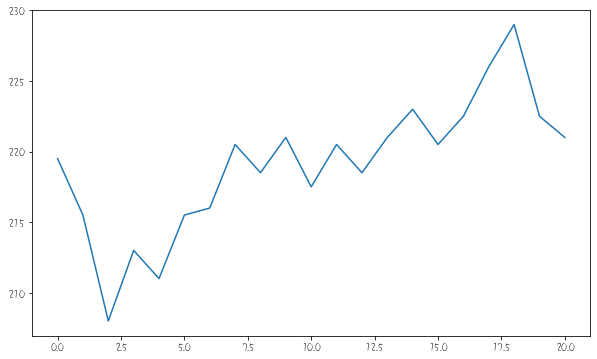

In [3]:


stock_2330_2019=stock_2330.fetch(2019,1) # 獲取 2019 年 01 月至今日之股票資料
stock_2330_2019_pd=pd.DataFrame(stock_2330_2019)


fig = plt.figure(figsize=(10, 6))
plt.plot(stock_2330_2019_pd.close, '-' , label="收盤價")


In [4]:

df_2330 = pdr.DataReader('2330.TW', 'yahoo')
df_2330

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-04,199.0,197.0,198.5,198.0,22088000.0,167.645782
2017-05-05,198.5,197.0,197.0,197.5,17036000.0,167.222443
2017-05-08,202.5,199.0,199.0,202.5,36538000.0,171.455902
2017-05-09,207.0,203.5,205.5,203.5,48077000.0,172.302643
2017-05-10,206.0,204.0,204.0,205.5,28312000.0,173.996002
...,...,...,...,...,...,...
2022-04-26,551.0,544.0,550.0,546.0,35825421.0,546.000000
2022-04-27,532.0,526.0,530.0,526.0,55941533.0,526.000000
2022-04-28,532.0,523.0,530.0,531.0,45380836.0,531.000000


Text(0.5, 1.0, '收盤價')

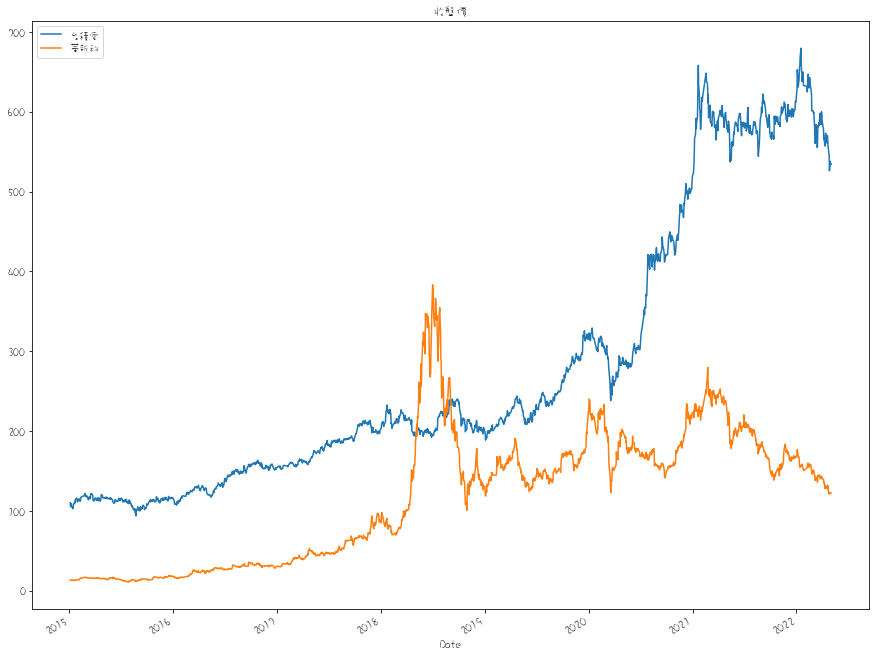

In [5]:
start = datetime.datetime(2015,1,1)
df_2330 = pdr.DataReader('2330.TW', 'yahoo', start=start)
df_2492 = pdr.DataReader('2492.TW', 'yahoo', start=start)

fig=plt.figure(figsize=(15, 12))
df_2330['Adj Close'].plot(label="台積電")
df_2492['Adj Close'].plot(label="華新科")
plt.legend()
plt.title("收盤價")

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-05,140.5,137.5,140.5,139.5,32046000.0,110.153938
2015-01-06,137.5,133.0,137.5,133.5,66778000.0,105.416115
2015-01-07,135.0,133.5,133.5,134.0,43703000.0,105.810936
2015-01-08,138.0,136.0,136.5,138.0,42491000.0,108.969460
2015-01-09,135.5,133.0,135.0,134.0,61558000.0,105.810936
...,...,...,...,...,...,...
2022-04-26,551.0,544.0,550.0,546.0,35825421.0,546.000000
2022-04-27,532.0,526.0,530.0,526.0,55941533.0,526.000000
2022-04-28,532.0,523.0,530.0,531.0,45380836.0,531.000000


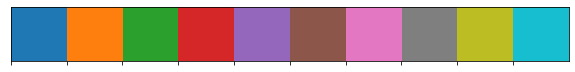

In [6]:
sns.palplot(sns.color_palette())
df_2330

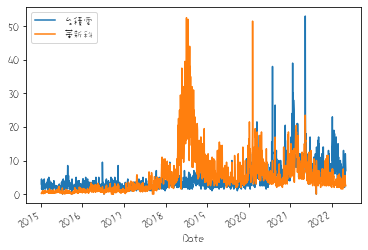

In [7]:
#台積電(2330)和華新科(2492)每天的波動

df_2330['High-Low'] = df_2330['High'] - df_2330['Low']
df_2492['High-Low'] = df_2492['High'] - df_2492['Low']

fig = plt.figure()
df_2330['High-Low'].plot(label="台積電")
df_2492['High-Low'].plot(label="華新科")
plt.legend()

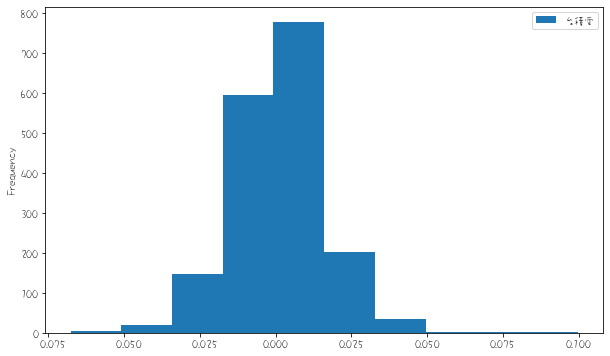

In [8]:
#plt.rcParams['axes.unicode_minus']=False
fig = plt.figure(figsize=(10, 6))
df_2330['daily-return'] = df_2330['Adj Close'].pct_change()
df_2330['daily-return'].plot(label="台積電", kind='hist')
plt.legend()

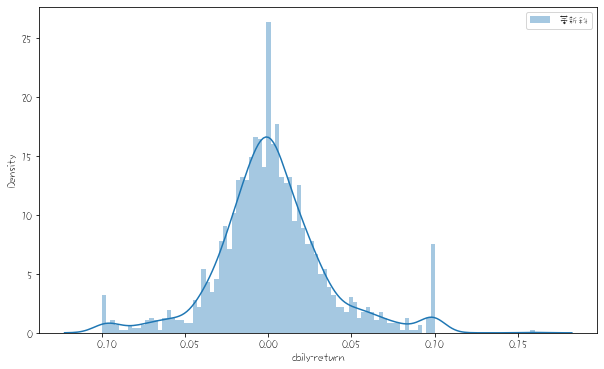

In [9]:
fig = plt.figure(figsize=(10, 6))
df_2492['daily-return'] = df_2492['Adj Close'].pct_change()
sns.distplot(df_2492['daily-return'].dropna(),bins=100, label="華新科")
plt.legend()
# pct_change() = (df_2492['Adj Close'][0] - df_2492['Adj Close'][1]) / df_2492['Adj Close'][1]

In [10]:
start = datetime.datetime(2015,1,5)
campany = ['2492.TW', '2330.TW', '3045.TW', '2412.TW', '2409.TW']
df_stock = pdr.DataReader(campany, 'yahoo', start=start)
df_stock
df_stock['Adj Close']['2330.TW']

Date
2015-01-05    110.153938
2015-01-06    105.416115
2015-01-07    105.810936
2015-01-08    108.969467
2015-01-09    105.810936
                 ...    
2022-04-26    546.000000
2022-04-27    526.000000
2022-04-28    531.000000
2022-04-29    538.000000
2022-05-03    534.000000
Name: 2330.TW, Length: 1783, dtype: float64

<AxesSubplot:xlabel='Date'>

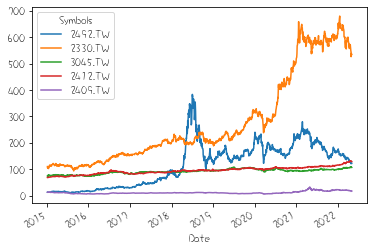

In [11]:
#比較股票之間關係
adjClose = df_stock['Adj Close']
adjClose.plot()

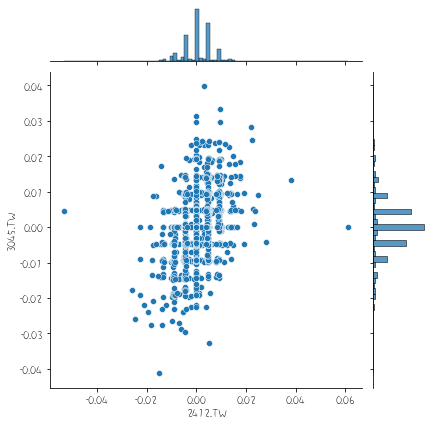

In [12]:
#比較收益率關係，使用scatter plot
plt.rcParams['axes.unicode_minus']=False
adjClose_pct = adjClose.pct_change()
sns.jointplot('2412.TW','3045.TW',adjClose_pct, kind="scatter")

<AxesSubplot:xlabel='2412.TW', ylabel='3045.TW'>

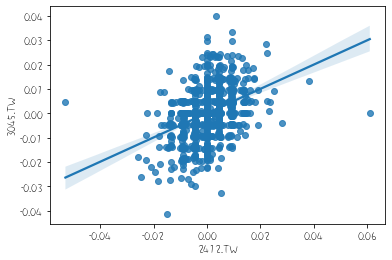

In [13]:
#加上線性回歸線

sns.regplot('2412.TW','3045.TW',adjClose_pct)

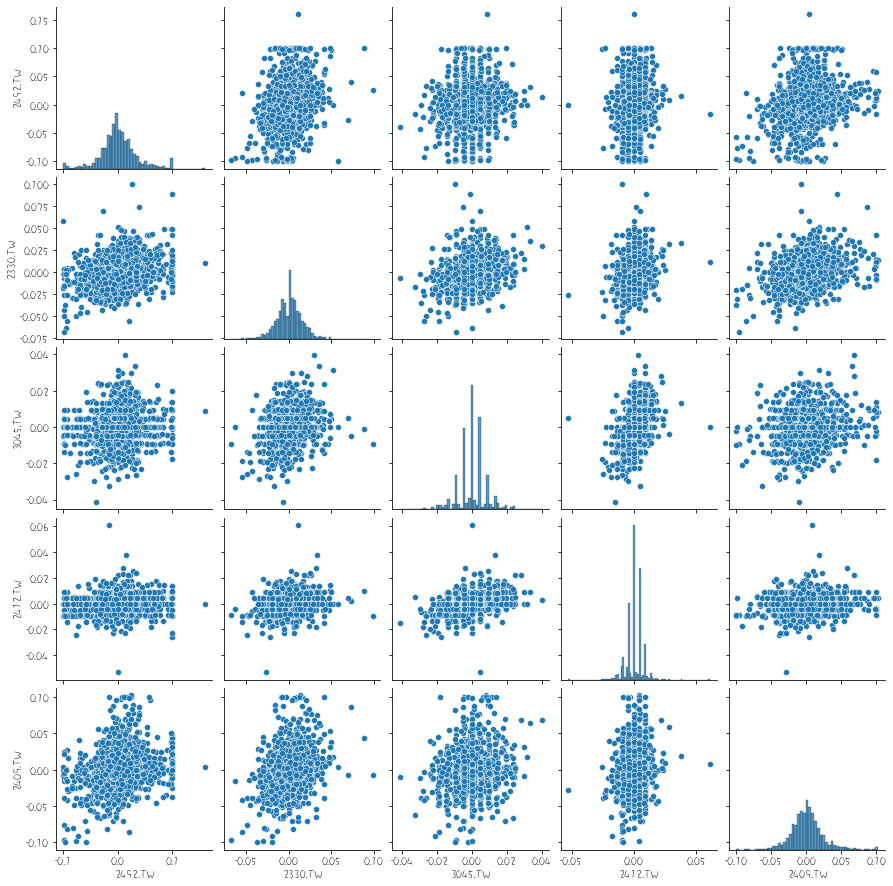

In [14]:
#同時比較多家公司
sns.pairplot(adjClose_pct.dropna())